In [20]:
import numpy as np

# initialize the simulation
ql = np.array([1,0,0,0])
qr = np.array([1,0,0,0])
J0 = np.diag([1,2,3,4]) # principal 2nd moments
L = np.array([[0,1,20,3],
              [0,0,10,10],
              [0,0,0,1],
              [0,0,0,0]])# Angular momentum, specify the upper triangle
L = L-L.T # completes the lower half
dt=0.0001
N=100000
dumpFreq=1000

qlsim=ql
qrsim=qr
qls=[ql]
qrs=[qr]
ts=[0]

In [21]:
from src import rotation
tsim=0
for i in range(N):
    qlsim,qrsim=rotation.step(qlsim,qrsim,L,J0,dt)
    tsim+=dt
    if(i%dumpFreq==0):
        qls.append(qlsim)
        qrs.append(qrsim)
        ts.append(tsim)
        print(str(i)+'\r',end='')

In [22]:
qls=np.array(qls)   
qrs=np.array(qrs)
Rs=[rotation.getR(qls[i],qrs[i]) for i in range(len(qls))]
KEs=[rotation.getKE(qls[i],qrs[i],L,J0) for i in range(len(qls))]
Omegas=[rotation.solveOmega(qls[i],qrs[i],L,J0) for i in range(len(qls))]
Rs=np.array(Rs)
KEs=np.array(KEs)
Omegas=np.array(Omegas)

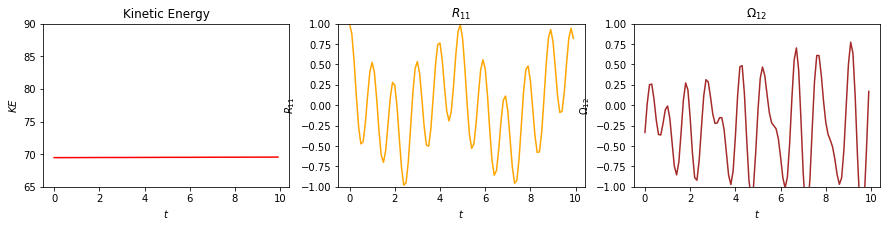

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax.set_title('Kinetic Energy')
ax.set_xlabel('$t$')
ax.set_ylabel('$KE$')
ax.set_ylim(bottom=65,top=90)
ax.plot(ts,KEs,c='red')

ax2.set_title('$R_{11}$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$R_{11}$')
ax2.set_ylim(bottom=-1,top=1)
ax2.plot(ts,Rs[:,0,0],c='orange')

ax3.set_title('$\Omega_{12}$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$\Omega_{12}$')
ax3.set_ylim(bottom=-1,top=1)
ax3.plot(ts,Omegas[:,0,1],c='brown')